In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle


In [20]:
data = pd.read_csv("House-Data.csv")

In [21]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
data=data.drop(columns=('id'))

<Axes: xlabel='price'>

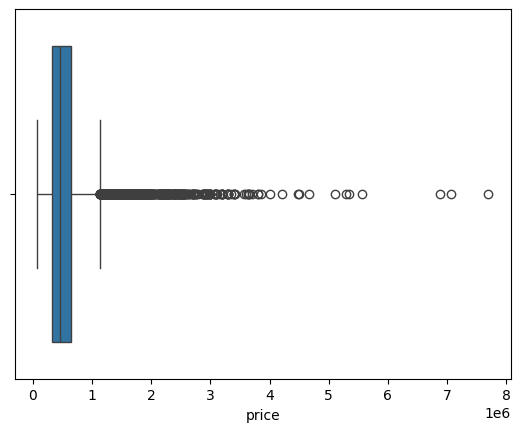

In [23]:

sns.boxplot(x='price', data=data)

In [24]:
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

replace_outliers(data)



<Axes: >

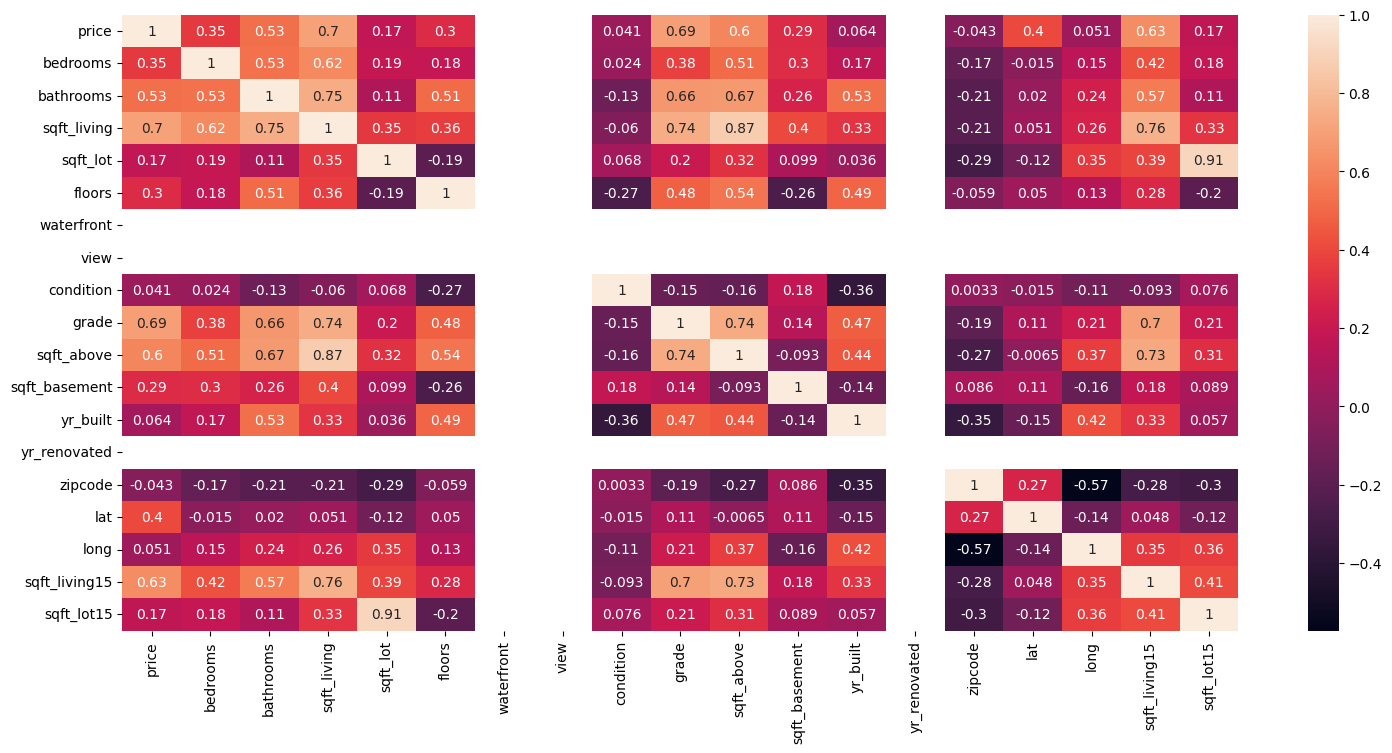

In [25]:
plt.figure(figsize=(18, 8))
sns.heatmap(data.select_dtypes('number').corr(),annot=True)

In [26]:
# Traitement de la date
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop(columns='date', inplace=True)

# Suppression des lignes manquantes
data.dropna(inplace=True)


##  Séparation des features et de la cible

In [27]:
X = data.drop('price', axis=1)
y = data['price']

In [28]:
cat_cols = ['zipcode']
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


## Normalisation + split

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## 🧠 Construction et entraînement du modèle ANN

In [39]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))



c:\USERS\TCHIB\ONEDRIVE\DOCUMENTS\VENV\.VENV\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
#architecture du modele
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        11,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,889 (85.50 KB)

 Trainable params: 21,889 (85.50 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation + entraînement

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 304455057408.0000 - mae: 492392.2188 - val_loss: 59976265728.0000 - val_mae: 174110.5156
Epoch 2/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 42014040064.0000 - mae: 157375.6875 - val_loss: 32870682624.0000 - val_mae: 144529.6406
Epoch 3/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 31861293056.0000 - mae: 144490.8750 - val_loss: 27359686656.0000 - val_mae: 132813.7812
Epoch 4/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 25459267584.0000 - mae: 127301.0938 - val_loss: 22100682752.0000 - val_mae: 117027.7969
Epoch 5/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 20228855808.0000 - mae: 111594.3828 - val_loss: 17435719680.0000 - val_mae: 101171.6719
Epoch 6/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 16133052416.0000 - mae: 96696.0391 - val_loss: 14127354880.0000 - val_mae: 88376.7969
Epoch 7/100
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13202376704.0000 - mae: 84753.2812 - val_loss:

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage
print(f"Évaluation du modèle ANN :")
print(f"MAE  (Mean Absolute Error)     : {mae:.2f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.2f}")
print(f"R²   (Score de détermination)  : {r2:.4f}")


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Évaluation du modèle ANN :
MAE  (Mean Absolute Error)     : 65750.26
RMSE (Root Mean Squared Error) : 94345.37
R²   (Score de détermination)  : 0.8613


## 📉 Visualisation de l’apprentissage

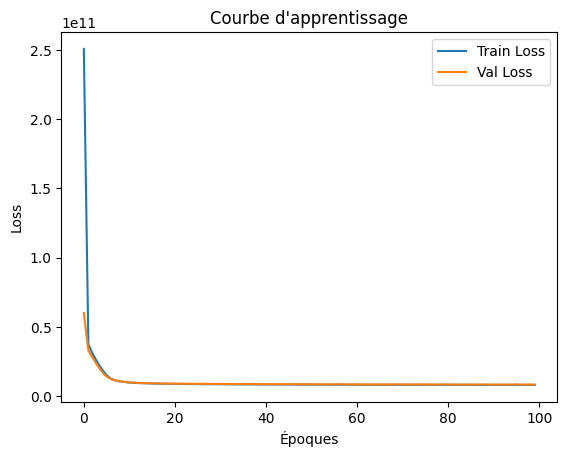

In [43]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()
plt.title("Courbe d'apprentissage")
plt.show()

## 💾 Sauvegarde du modèle et du scaler

In [44]:
print(scaler)


MinMaxScaler()


In [45]:
model.save("ann_model.keras")
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [37]:
import pickle

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print(type(scaler))
print(dir(scaler))  # pour voir ses attributs


<class 'sklearn.preprocessing._data.StandardScaler'>
['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_reset', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'copy', 'feature_names_in_', 'fit', 'fit_transform', 'get_feature_names_out', 'g